# Matrices, Arrays, and Lists

Joshua P. French  
October 16, 2023

To open this information in an interactive Colab notebook, click the
Open in Colab graphic below.

<a href="https://colab.research.google.com/github/jfrench/DataWrangleViz/blob/master/07-matrices-arrays-lists.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg">
</a>

------------------------------------------------------------------------

In this module we will cover some additional data structures available
in R that were not covered in the Crash Course in R Module.
Specifically, we will discuss matrices, arrays, and lists. These data
structures are fundamental to performing data analysis in R,
particularly if we need to program our own methods.

We start by making sure the necessary R packages are installed.

In [2]:
if(!require(microbenchmark, quietly = TRUE)) {
  install.packages("microbenchmark",
                   repos = "https://cran.rstudio.com/")
}

# Matrices and matrix algebra

## Why are matrices and matrix algebra important knowledge for data scientists? ([YouTube](https://youtu.be/40THrClg9Ho), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f36ecb67-06e8-45a1-8fb8-b099015ade57))

Understanding how to use matrices is foundational knowledge for any data
scientist.

-   Matrices are a simple, efficient way of storing many kinds of data.
-   Matrix algebra is the most basic way of manipulating data
    represented in matrix format.

Numeric matrices are often needed to implement complex algorithms used
for data science methods related to regression, optimization, and
classification.

## What is a matrix? ([YouTube](https://youtu.be/BrNr3cpLxQY), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=35569ba5-8909-4a0b-bb3a-b099015b52e4))

A matrix is a two-dimensional object whose values have the same data
type.

-   We can have numeric, character, or logical matrices, but only one
    data type can exist at a time in a matrix.

A matrix $\mathbf{A}$ with $m$ rows and $n$ columns (an $m\times n$
matrix) will be denoted as

$$
\mathbf{A} = \begin{bmatrix}
\mathbf{A}_{1,1} & \mathbf{A}_{1,2} & \cdots & \mathbf{A}_{1,n} \\
\mathbf{A}_{2,1} & \mathbf{A}_{2,2} & \cdots & \mathbf{A}_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
\mathbf{A}_{m,1} & \mathbf{A}_{m,2} & \cdots & \mathbf{A}_{m,n} \\
\end{bmatrix},
$$

where $\mathbf{A}_{i,j}$ denotes the element in row $i$ and column $j$
of matrix $\mathbf{A}$.

A **column vector** is a matrix with a single column. A **row vector**
is a matrix with a single row.

-   Vectors are commonly denoted with bold lowercase letters such as
    $\mathbf{a}$ or $\mathbf{b}$, but this may be simplified to
    lowercase letters such as $a$ or $b$.

A $p\times 1$ column vector $\mathbf{a}$ may constructed as

$$
\mathbf{a} = [a_1, a_2, \ldots, a_p] = 
\begin{bmatrix}
a_1 \\ a_2 \\ \vdots \\ a_p
\end{bmatrix}.
$$

A vector is assumed to be a column vector unless otherwise indicated.

## Creating a matrix ([YouTube](https://youtu.be/OsO39R0S6nY), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=bf3047ad-d8ea-4ba0-99c0-b099015b6066))

A matrix can be created in R by passing a vector to the `matrix`
function and specifying the number of rows and columns the matrix will
have.

-   The values of the vector will be placed into the matrix one column
    at a time.
-   The `nrow` argument specifies the number of rows.
-   The `ncol` argument specifies the number of columns.

Let’s create a $5\times 2$ matrix with the elements $1, 2, \ldots, 5$ in
the first column and $6, 7, \ldots, 10$ in the second column.

In [3]:
A <- matrix(1:10, nrow = 5, ncol = 2)
A

If we change the `byrow` argument of the `matrix` function to `TRUE`,
then the values will be placed row by row, as in the example below.

In [4]:
matrix(1:6, nrow = 2, ncol = 3, byrow = TRUE)

The `cbind` and `rbind` functions can be used to create a `matrix`
object by combining vectors by columns or rows, respectively.

In the example below, we combine the vectors \[1, 2, 3, 4\] and \[5, 6,
7, 8\] columnwise to create a matrix.

In [5]:
cbind(1:4, 5:8)

Alternatively, we can use the `rbind` function to create a matrix by
combining the vectors row by row.

In [6]:
rbind(1:4, 5:8)

The `dim` function can be used to determine/confirm the number of rows
or columns in a matrix.

In [7]:
dim(A)

The `nrow` and `ncol` functions can be used to determine the number of
rows and columns, respectively, in a `matrix` object.

In [8]:
nrow(A)

In [9]:
ncol(A)

## Subsetting a matrix ([YouTube](https://youtu.be/vm-biax5mmg), [Panopto](https://ucdenver.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9d1da8bf-1118-4105-9eb8-b099015bc078))

We can access a subset of a `matrix` object using the `[` operator and
providing vectors with the desired rows and columns separated by a
comma.

If `A` is a matrix, then we can select the subset of `A` using the
syntax `A[r, c]`, where `r` and `c` are `numeric` vector indicating the
desired rows and columns, respectively, that we want to select.

-   If we select a single row or column, then the subsetted object will
    simplify to `vector` object instead of a `matrix`.
-   If we don’t supply a vector of rows or columns, then all rows or
    columns will be returned.
-   We can use the `-` notation to select all but the specified rows or
    columns. This is similar to the syntax used for data frames.

This is easiest to understand by walking through a set of examples.

Let’s define a $4\times 3$ matrix, `B`, below.

In [10]:
B <- matrix(1:12, ncol = 3)
B

Let’s select columns 2 and 3 of `B`.

In [11]:
B[, 2:3]

Let’s select rows 1 and 4 of `B`.

In [12]:
B[c(1, 4), ]

Let’s select columns 2 and 3 of rows 1 and 4 of `B`.

In [13]:
B[c(1, 4), 2:3]

Let’s select all columns of `B` except the third.

In [14]:
B[,-3]

Our matrix simplifies to a vector if we only select a single row or
column.

We select the second row of `B`.

In [15]:
B[2, ]

We select the second column of `B`.

In [16]:
B[,2]

If we want to retain the `matrix` structure of `B` when we select a
single row or column, then we set the optional `drop` argument to
`FALSE` after the column argument.

In [17]:
B[2, , drop = FALSE]

In [18]:
B[, 2, drop = FALSE]

## Matrix operations

### Addition and subtraction ([YouTube](), [Panopto]())

We can add or subtract the elements of two matrices as long as they have
the same size.

We create two $2\times 3$ matrices below.

In [19]:
A <- matrix(1:6, nrow = 2, ncol = 3, byrow = TRUE)
A

In [20]:
B <- matrix(c(2, 1, 9, 3, 1, 1), nrow = 2, ncol = 3)
B

We can add the two matrices below using the `+` operator. The result is
simply the sum of the values in the same position of the matrices.

In [21]:
A + B

Subtraction works in the same way, as shown below.

In [22]:
A - B

### Scalar multiplication ([YouTube](), [Panopto]())

A matrix multiplied by a scalar value $c\in\mathbb{R}$ is the matrix
obtained by multiplying each element of the matrix by $c$.

To perform scalar multiplication in R, we simply use the `*` operator to
multiply the scalar value by the matrix.

In the code below, we double the values in `A`.

In [23]:
2 * A

### Matrix multiplication ([YouTube](), [Panopto]())

Consider two matrices $\mathbf{A}$ and $\mathbf{B}$. The matrix product
$\mathbf{AB}$ is only defined if the number of columns in $\mathbf{A}$
matches the number of rows in $\mathbf{B}$.

Assume $\mathbf{A}$ is an $m\times n$ matrix and $\mathbf{B}$ is an
$n\times p$ matrix. $\mathbf{AB}$ will be an $m\times p$ matrix and $$
(\mathbf{AB})_{i,j} = \sum_{k=1}^{n} \mathbf{A}_{i,k}\mathbf{B}_{k,j}.
$$

We consider multiplying the two matrices below.

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
1 & 4\\
2 & 5\\
3 & 6
\end{bmatrix}=
\begin{bmatrix}
1\cdot 1 +  2 \cdot 2 + 3 \cdot 3 & 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6\\
4\cdot 1 +  5 \cdot 2 + 6 \cdot 3 & 4 \cdot 4 + 5 \cdot 5 + 6 \cdot 6\\
\end{bmatrix}=
\begin{bmatrix}
14 & 32\\
32 & 77\\
\end{bmatrix}.
$$

We multiply two matrices of the correct size using the `%*%` operator.
Let’s multiply these same matrices using R

In [24]:
A

In [25]:
B <- matrix(1:6, nrow = 3, ncol = 2)
B

In [26]:
A %*% B

### Elementwise matrix multiplication ([YouTube](), [Panopto]())

Consider two matrices $\mathbf{A}$ and $\mathbf{B}$ that have the same
dimensions. The elementwise product, denoted
$\mathbf{A} \circ \mathbf{B}$ is the product of the elements in the same
position of the matrix.

Assume $\mathbf{A}$ and $\mathbf{B}$ are $n\times m$ matrices.
$\mathbf{A} \circ \mathbf{B}$ will be an $n\times m$ matrix and $$
(\mathbf{A} \circ \mathbf{B})_{i,j} = \mathbf{A}_{i,j}\mathbf{B}_{i,j}.
$$

We perform elementwise multiplication of the two matrices below.

$$
\begin{bmatrix}
1 & 4\\
2 & 5\\
3 & 6
\end{bmatrix} \circ
\begin{bmatrix}
7 & 10\\
8 & 11\\
9 & 12
\end{bmatrix}=
\begin{bmatrix}
1 \cdot 7 & 4 \cdot 10\\
2 \cdot 8 & 5 \cdot 11\\
3 \cdot 9 & 6 \cdot 12
\end{bmatrix}=
\begin{bmatrix}
7 & 40\\
16 & 55\\
27 & 72
\end{bmatrix}.
$$

We perform elementwise multiplication of two matrices of the correct
size using the `*` operator. Let’s multiply these same matrices using R

In [27]:
A <- matrix(1:6, ncol = 2)
A

In [28]:
B <- matrix(7:12, ncol = 2)

In [29]:
B

In [30]:
A * B

### Transpose ([YouTube](), [Panopto]())

The **transpose** of a matrix $\mathbf{A}$, denoted $\mathbf{A}^T$,
exchanges the rows and columns of the matrix. More formally, the $i,j$
element of $\mathbf{A}^T$ is the $j,i$ element of $\mathbf{A}$, i.e.,
$(\mathbf{A}^T)_{i,j} = \mathbf{A}_{j,i}$.

We can use the `t` function to obtain the transpose of a matrix.

We print the matrix `A` that we have previously defined.

In [31]:
A

We compute the transpose of `A` using `t`.

In [32]:
t(A)

## Special matrices ([YouTube](), [Panopto]())

### Square matrices

A matrix is **square** if the number of rows equals the number of
columns.

The **diagonal elements** of an $n\times n$ square matrix $\mathbf{A}$
are the elements $\mathbf{A}_{i,i}$ for $i = 1, 2, \ldots, n$.

Non-diagonal elements of $\mathbf{A}$ are called **off-diagonal**
elements.

### Identity matrix

The $n\times n$ **identity** matrix, $\mathbf{I}_{n \times n}$, is a
matrix for which the diagonal elements are all 1 and the non-diagonal
elements are all 0.

-   Context often makes it clear what the dimensions of an identity
    matrix are, so the notation for $\mathbf{I}_{n\times n}$ is often
    simplified to $\mathbf{I}$ or $I$.

The syntax `diag(n)` will create an $n\times n$ identity matrix in R.

We create a $3\times 3$ identify matrix below.

In [33]:
diag(3)

### Inverse matrix

An $n\times n$ matrix $\mathbf{A}$ is invertible if there exists a
matrix $\mathbf{B}$ such that
$\mathbf{AB}=\mathbf{BA}=\mathbf{I}_{n\times n}$.

The inverse of $\mathbf{A}$ is denoted $\mathbf{A}^{-1}$.

-   Inverse matrices only exist for square matrices.

The `solve` function can be used to compute the inverse of matrix, e.g.,
`solve(A)`.

-   This will likely cause numeric issues, so don’t do this.

Inverse matrices are nearly always multiplied by a different matrix,
e.g., $\mathbf{b}$.

To compute $\mathbf{A}^{-1} \mathbf{b}$, we use the syntax
`solve(A, b)`.

In the example below, we use `solve` to compute
$\mathbf{A}^{-1} \mathbf{b}$.

In [34]:
A <- matrix(c(3, 0.5, 0.2, 
              0.5, 2, 0.1,
              0.2, 0.1, 1),
            nrow = 3)
A

In [35]:
b <- c(1, 0.7, 3)
b

In [36]:
solve(A, b)

Because vectors are assumed to be column vectors, the (rounded) result
above is equivalent to

$$
\begin{bmatrix}
0.11\\
0.18\\
2.96
\end{bmatrix}.
$$

## Example: Line of best fit ([YouTube](), [Panopto]())

A common application of matrix algebra is finding the “line of best fit”
for the points observed in a scatter plot.

A line can be written as

$$y = a + b x,$$

where:

-   $a$ is the y-intercept (the value of $y$ when $x = 0$).
-   $b$ is the slope of the line. $y$ changes by $b$ when $x$ increases
    by 1.

Suppose that we observe $n$ paired sets of $(x, y)$ values

$$(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n).$$

We want to find the values of $a$ and $b$ that minimize the residual sum
of squares function

$$
RSS(a, b) = \sum_{i=1}^n (y_i - a - b  x_i)^2.
$$

We can find the values of $a$ and $b$ using matrix algebra. First, we
must define a matrix and a column vector.

Define $$
\mathbf{X} = 
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}.
$$

Define

$$
\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}.
$$

The values of $a$ and $b$ that minimize $RSS(a, b)$, which we will call
$\hat{a}$ and $\hat{b}$, are computed through the equation

<span id="eq-ols-solution">$$
\begin{bmatrix}
\hat{a} \\
\hat {b}
\end{bmatrix} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}.
 \qquad(1)$$</span>

Let says we have the following 6 pairs of $(x, y)$ values:

$$(1, 4.9), (1.3, 4.2), (1.7, 4.0), (2.1, 5.7), (3, 4.6), (3.5, 6.8).$$
We turn these into two vectors, `x` and `y`, below.

In [37]:
x <- c(1, 1.3, 1.7, 2.1, 3, 3.5)
y <- c(4.9, 4.2, 4.0, 5.7, 4.6, 6.8)

We create a scatter plot of the vectors below.

In [38]:
plot(x, y)

We now create the $\mathbf{X}$ matrix using the `cbind` function by
combining a vector of 1s with `x`.

In [39]:
X <- cbind(1, x)
X

Now, we use [Equation 1](#eq-ols-solution) to determine the line of best
fit.

For clarity, we’ll first compute $\mathbf{X}^T \mathbf{X}$, then
$\mathbf{X}^T \mathbf{y}$, and then use the `solve` function to obtain
our solution.

In [40]:
xtx <- t(X) %*% X
xty <- t(X) %*% y
solve(xtx, xty)

Thus, our solution for $\hat{a}$ and $\hat{b}$ that minimizes
$RSS(a, b)$ is $\hat{a} = 3.58$ and $\hat{b} = 0.69$.

We use the `abline` function to add the line of best fit to our scatter
plot.

In [41]:
plot(x, y)
abline(a = 3.58, b = 0.69)

## Optimizing matrix algebra ([YouTube](), [Panopto]())

It is straightforward to perform matrix algebra in R. However, it is
more difficult to write *efficient* (faster) matrix code. We provide
some basic tips below.

### `crossprod` and `tcrossprod`

The `crossprod` and `tcrossprod` functions are faster approaches to
performing matrix multiplication when one of the matrices must first be
transposed.

If we have matrices `A` and `B` of compatible dimensions, then:

-   `t(A) %*% B` is equivalent to `crossprod(A, B)`.
-   `A %*% t(B)` is equivalent to `tcrossprod(A, B)`.

`crossprod` and `tcrossprod` are faster than their equivalent approaches
because the equivalent approaches compute the transpose of matrix in
memory before performing the multiplication. The `crossprod` and
`tcrossprod` functions modify their multiplication algorithms so that
the transpose matrix doesn’t have to be created prior to multiplication.

To illustrate this difference, we create `A`, a $50\times 2$ matrix of
values and `B`, a $50 \times 2$ matrix of values by drawing the
appropriate number of values from a standard normal distribution. We use
the `set.seed` function to make the example reproducible.

In [42]:
set.seed(314)
A <- matrix(rnorm(100), ncol = 2)
B <- matrix(rnorm(100), ncol = 2)

First, we use the `all.equal` function to confirm that the standard and
optimized approaches produce the same results. `all.equal` confirms that
the supplied objects are equal to each other.

In [43]:
all.equal(t(A) %*% B, crossprod(A, B))

In [44]:
all.equal(A %*% t(B), tcrossprod(A, B))

We will use the `microbenchmark` function from the **microbenchmark**
package (Mersmann 2023) to time the optimized and standard approaches to
computing $\mathbf{A}^T \mathbf{B}$ and $\mathbf{A} \mathbf{B}^T$.

We start by loading the **microbenchmark** package.

In [45]:
library(microbenchmark)

We now compute $\mathbf{A}^T \mathbf{B}$ using the standard approach and
using `crossprod` within the `microbenchmark` function. The
`microbenchmark` function will perform each computation 100 times by
default to determine the typical speed. We then use the `plot` function
to plot the results.

In [46]:
t1 <- microbenchmark::microbenchmark(t(A) %*% B, crossprod(A, B))
plot(t1)

While the results shown in the above plot will depend on the speed of
the computer used to perform the calculation, the boxplot shown for
`crossprod(A, B)` should be lower then `t(A) %*% B`, which means the
`crossprod` approach is faster than the standard approach.

We perform a simialr analysis for computing $\mathbf{A}\mathbf{B}^T$.

In [47]:
t2 <- microbenchmark(A %*% t(B), tcrossprod(A, B))
plot(t2)

Once again, the plot of our timing results should show that
`tcrossprod(A, B)` can be computed faster than `A %*% t(B)`.

### Order of matrix multiplication

Matrix multiplication is associative, meaning that if we have compatible
matrices $\mathbf{A}$, $\mathbf{B}$ and $\mathbf{C}$, then
$$(\mathbf{A B})\mathbf{C} = \mathbf{A} (\mathbf{B C}).$$

The order of matrix multiplication can greatly impact how long it takes
to perform the operations.

**Prioritize performing operations that produce smaller matrices
first.** Smaller can mean the total number of rows/columns or long/thin
matrices, depending on the context.

We create three matrices below filled with random values: `A` is a
matrix of size $500\times 2$, `B` is a matrix of size $2 \times 50$, `C`
is a $50\times 1$ column vector.

In [48]:
set.seed(1999)
A <- matrix(rnorm(1000), ncol = 2)
B <- matrix(rnorm(100), nrow = 2)
C <- rnorm(50)

Computing $\mathbf{A}(\mathbf{BC})$ is much faster than computing
$(\mathbf{AB})\mathbf{C}$ because $\mathbf{BC}$ first produces
$2\times 1$ matrix while $\mathbf{AB}$ produces a much larger
$500 \times 50$ matrix.

We confirm this by timing these operations using the `microbenchmark`
function and plotting the results.

In [49]:
t3 <- microbenchmark((A %*% B) %*% C,
                     A %*% (B %*% C))
plot(t3, las = 2, cex.axis = 0.5)

# Arrays

## What is an array? ([YouTube](), [Panopto]())

An array is a multidimensional, homogeneous (one data type) data
structure.

-   Arrays can be 1, 2, 3, $\ldots$ dimensions.
-   Arrays are a generalization of a matrix.

We will discuss 3-dimensional arrays because they are the easiest to
visualize.

A 3-dimensional array is like a loaf of bread.

-   Each slice of bread is a two-dimensional matrix/array.
-   We stack the matrix slices side-by-side to get the third dimension
    of our array.

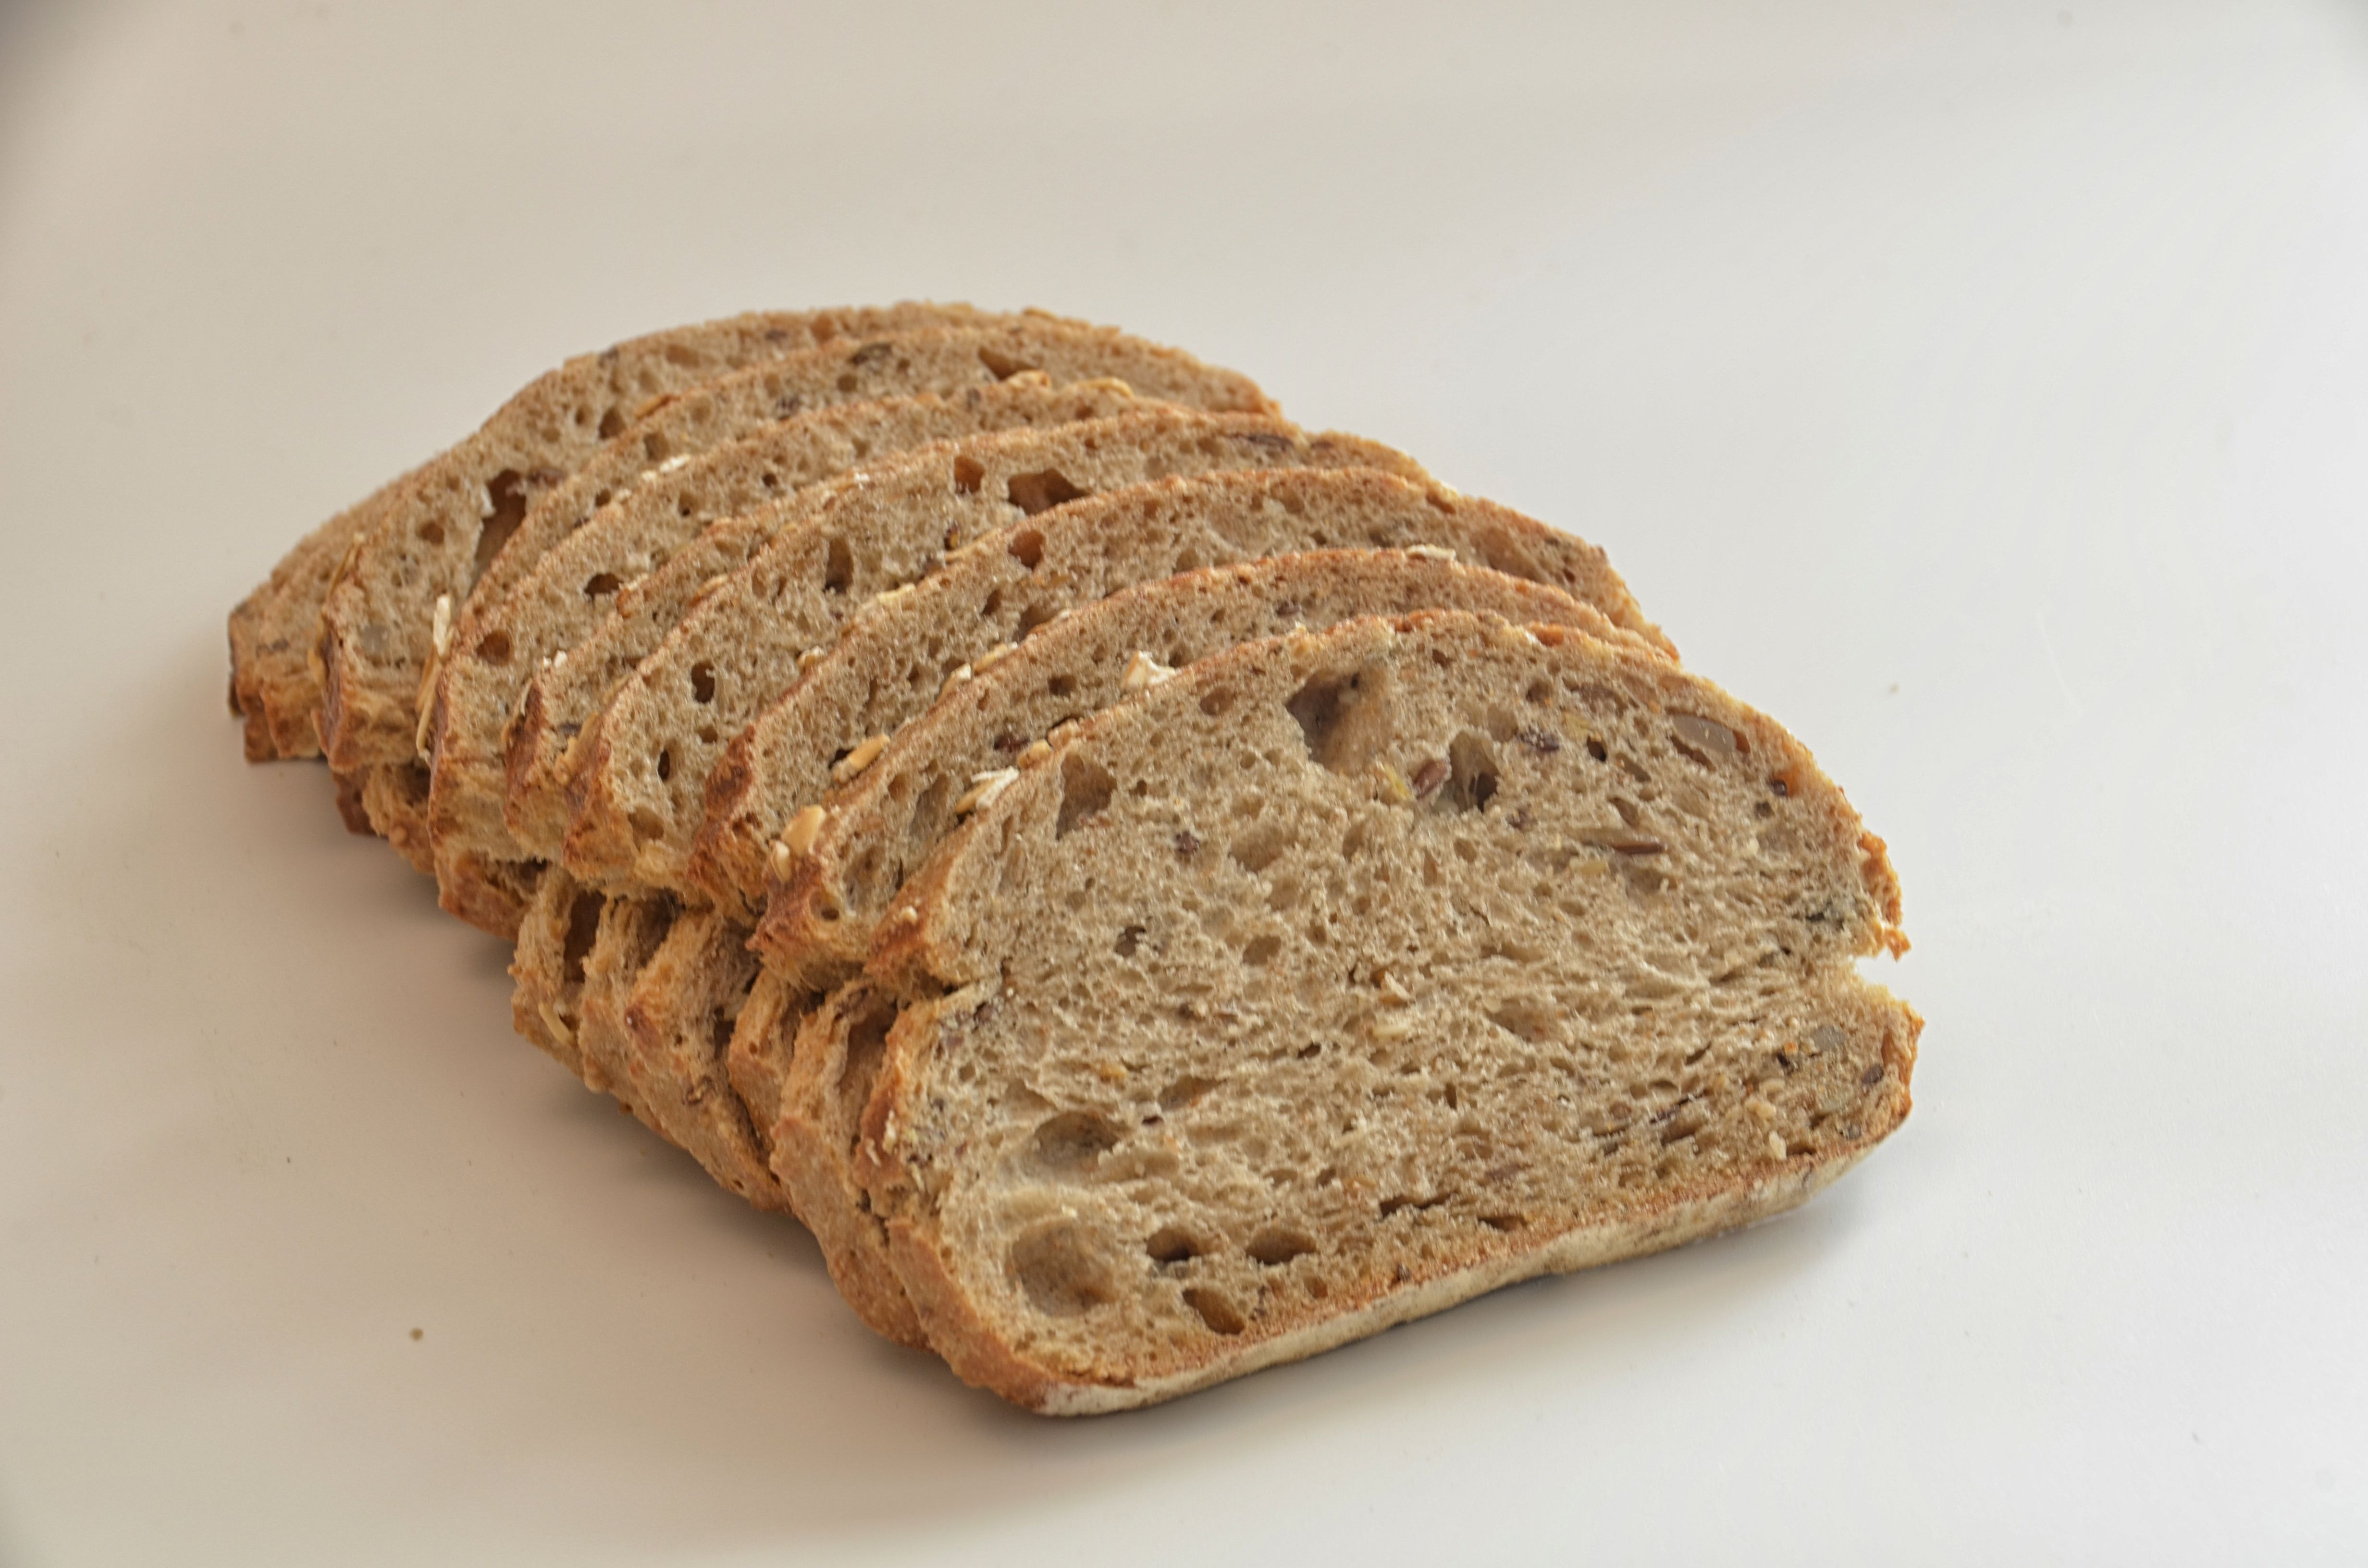

## Creating an array in R ([YouTube](), [Panopto]())

We can create an array in R using the `array` function.

The two main arguments of the `array` function are:

-   `data`: an atomic vector.
-   `dim`: a numeric vector indicating the size of each dimension.

Similar to the `matrix` function, the `array` function fills in the
columns of each matrix before repeating the process for each element of
the third dimension.

We create a 3-dimensional array with dimension $3\times 2 \times 4$
below.

In [50]:
A <- array(1:24, dim = c(3, 2, 4))
A

Alternatively, we can bind matrices or arrays together using the `abind`
function in the **abind** package (Plate and Heiberger 2016).

This is actually a very complex function, but we illustrate its use for
creating a 3-dimensional array by binding 2-dimensional matrices.

-   Run `?abind::abind` in the Console for more details.

We first load the **abind** package.

In [51]:
library(abind)

We now bind two matrices along a 3rd-dimension to create a 3-dimensional
array.

In [52]:
A <- abind(
      matrix(1:4, nrow = 2),
      matrix(5:8, nrow = 2),
      along = 3)
A

We create a second 3-dimensional array (of size $2\times 2 \times 2$
named `B` below.

In [53]:
B <- array(9:16, dim = c(2, 2, 2))

To bind `A` and `B` together, we can use the `abind` function.

In [54]:
abind(A, B)

The `dim` function can be used to determine the size of an array.

In [55]:
dim(A)

## Subsetting an array ([YouTube](), [Panopto]())

We can subset an array in much the same way as a matrix. We use the `[`
operator and provide vectors indicate the desired positions in each
dimension that we want to extract, with each dimension being separated
by a comma.

# Lists

## What is a list? ([YouTube](), [Panopto]())

A list in R is a non-atomic vector.

-   It is a vector, meaning it is one-dimensional.
-   It is non-atomic, meaning it can hold data beyond the basic types
    (`character`, `integer`, `double`, `logical`, `complex`, `raw`).

Lists are commonly used in two different ways:

1.  A vector with elements of the same non-atomic type, e.g., a vector
    of `lm` objects from the `lm` function.
2.  A vector of elements of many different types. This is often used in
    objected-oriented programming in R, which we will not discuss.

We will discuss the first type of list in the context of loops and apply
functions, where they make more sense.

We will discuss the second type below.

## Creating a list ([YouTube](), [Panopto]())

A list is stored as a `list` object.

A `list` object can be created using the `list` function. Simply pass
the objects you want to include the `list` as arguments to the `list`
function.

We provide an example below. We create a list that includes a vector, a
matrix, and a function.

In [56]:
list(1:10, matrix(1:10, nrow = 2), mean)

It is common to assign the elements of a list names to make them easier
to reference. To do that, we simply use the syntax `name = x` in our
list, where `name` is the name we want to give the element and `x` is
the object we are including in our list.

In [57]:
mylist <- list(a = 1:10, b = matrix(1:10, nrow = 2), f = mean)
mylist

We can create a new list by combining two or more other lists using the
`c` function.

We combine 3 simple lists below using the `c` function.

In [58]:
c(list(1, 1:2), list("a", c("a", "b")), list(TRUE, c(TRUE, FALSE)))

## Subsetting a list ([YouTube](), [Panopto]())

Subsetting a list is more similar to subsetting an atomic vector than it
is to subsetting a matrix or array.

We create a simple 4-element list with names components below.

In [59]:
a <- list(a = 1, b = 1:2, c = 1:3, d = 1:4)

To subset elements of the list, we append `[idx]` to the end of the
list’s name, where `idx` is a vector with the indices of the elements we
want to extract or a logical vector indicating the elements we want to
extract.

In the example below, we extract the 1st and 3rd elements of `a`.

In [60]:
a[c(1, 3)]

In the next example, we use a logical vector to subset the 2nd and 4th
elements of `a`.

In [61]:
a[c(FALSE, TRUE, FALSE, TRUE)]

Since the elements of the list are named, we can also use a vector of
character strings to indicate the elements we want to subset.

We subset elements `c` and `d` below.

In [62]:
a[c("c", "d")]

If we want to extract a specific element out of our list, then we append
`[[i]]` to the list’s name, with `i` indicating the index of the element
we want to extract.

In the example below, we extract the second element of `a`. Notice that
the result is the vector `1:2`, which is what is contained in the 2nd
element of `a`.

In [63]:
a[[2]]

What is the difference between the previous result and what we get from
the following command?

In [64]:
a[2]

In the former example, we extracted the object that was in the 2nd
element of `a`. In the latter example, we get a list with only one
element. The only element of this list is what was previously the 2nd
element of `a`.

For a list with named components, we can use the `$` operator to extract
a specific element.

In the code below, we extract the object in element `"c"` of `a`.

In [65]:
a$c

## Nested Lists ([YouTube](), [Panopto]())

We can create lists of lists of lists, which created “nested” lists
because the lists are nested in each other.

In that case, to subset elements of the lists, we might need to stack
usage of `[]` or `[[]]` side by side to subset or extract the desired
elements.

We create a nested list below.

In [66]:
b <- list(list(1, 1:2, list(3, 3:4)), 5:7)
b

The first element of the top-level of the list is another list with the
second element is the vector `5:7`.

In [67]:
b[[1]]

In [68]:
b[[2]]

`b[[1]]` is a list with 3 elements: the first element is the vector `1`,
the second element is the vector `[3]`, while the third element is
another list with two elements.

We can subset the first two elements of `b[[1]]` by appending `[1:2]` to
the previous syntax.

In [69]:
b[[1]][1:2]

We can extract the third element of `b[[1]]` by appending `[[3]]` to the
previous syntax.

In [70]:
b[[1]][[3]]

We can access information contained in the 3rd element of the list
contained in element of `b` in a similar way.

Mersmann, Olaf. 2023. *Microbenchmark: Accurate Timing Functions*.
<https://github.com/joshuaulrich/microbenchmark/>.

Plate, Tony, and Richard Heiberger. 2016. *Abind: Combine
Multidimensional Arrays*. <https://CRAN.R-project.org/package=abind>.